In [38]:
import os
import sys

%matplotlib inline
import matplotlib.pyplot as plt

import pickle
import nipiezojenapy
import numpy as np

module_path = os.path.abspath(os.path.join('..', 'src', 'qt3utils', 'datagenerators'))
sys.path.append(module_path)

from princeton import Spectrometer


In [16]:
piezo_write_channels='ao0,ao1,ao2'
piezo_read_channels='ai0,ai1,ai2' 

controller = nipiezojenapy.PiezoControl(device_name = 'Dev1',
                                  write_channels = piezo_write_channels.split(','),
                                  read_channels = piezo_read_channels.split(','))


In [17]:
s = Spectrometer()
s.initialize()

In [18]:
# This relies on user input

s.exposure_time = 2000.0 
print('Exposure time: {}ms'.format(s.exposure_time))

s.num_frames = "1"
print('Sensor temperature setpoint: {} C'.format(s.sensor_setpoint))

s.sensor_setpoint = -70.0
print('Sensor temperature: {} C'.format(s.sensor_temperature))

s.center_wavelength = 700.0
print('Number of frames: {}'.format(s.num_frames))

print('Grating: {}'.format(s.grating))

Exposure time: 2000.0ms
Sensor temperature setpoint: -70.0 C
Sensor temperature: -70.0 C
Number of frames: 1
Grating: [500nm,300][2][0]


In [19]:
# Most values here rely on user input as well

hyperspectral_im = None
z = 43
xs = np.linspace(50, 60, num=5)
ys = np.linspace(45, 55, num=5)
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        controller.go_to_position(x,y,z)
        spectrum, wavelength = s.acquire_step_and_glue([600.0, 850.0])
        if i==0 and j==0:
            hyperspectral_im = np.zeros((xs.shape[0], ys.shape[0], spectrum.shape[0]))
        hyperspectral_im[i, j, :] = spectrum

mean_spectrum = np.mean(hyperspectral_im, axis=2)

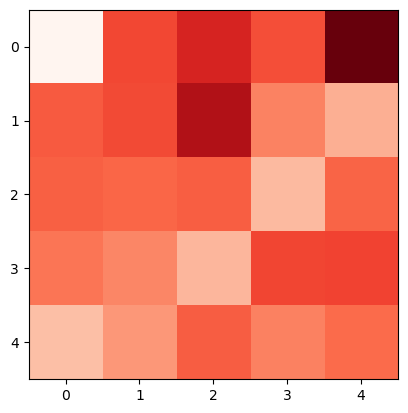

In [34]:
# This is mock data and a real sample was not used. This is just to demo the software

plt.imshow(mean_spectrum, cmap='Reds', interpolation='nearest')

### Save wavelength and data

In [36]:
d = {"wavelength":wavelength, "im":hyperspectral_im}

with open('3D_data.pkl', 'wb') as f:
    pickle.dump(d, f)

In [21]:
s.finalize()

Closed AddInProcess.exe
